In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm 
%matplotlib inline

#### 加载数据
此数据可以在我的github中获取。

In [3]:
def loadDataSet(fileName):
    """loadDataSet（对文件进行逐行解析，从而得到第行的类标签和整个数据矩阵）
    Args:
        fileName 文件名
    Returns:
        dataMat  数据矩阵
        labelMat 类标签
    """
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat, labelMat

#### 为样本和类别赋值

In [4]:
X,Y = loadDataSet('G:\\desktop\\svmdata线性不可分 .txt')
X = np.mat(X)

#### 拟合一个SVM模型

In [5]:
clf = svm.SVC(kernel='linear')
clf.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#### 获得支持向量
如果是二分类任务的话，第一个支持向量和最后一个支持向量肯定为不同的类别。

In [6]:
clf.support_vectors_

array([[ 3.125951,  0.293251],
       [ 4.658191,  3.507396],
       [ 3.023938, -0.057392],
       [ 5.286862, -2.358286],
       [ 6.080573,  0.418886],
       [ 2.912122, -0.202359],
       [ 3.223038, -0.552392],
       [ 3.457096, -0.082216],
       [ 6.960661, -0.245353],
       [ 2.893743, -1.643468],
       [ 6.543888,  0.433164]])

#### 获得支持向量的索引

In [7]:
clf.support_

array([10, 17, 30, 54, 55, 97, 23, 29, 46, 52, 69])

#### 为每一个类别获得支持向量的数量

In [8]:
clf.n_support_ 

array([6, 5])

#### 获取分割超平面法向量值

In [9]:
w = clf.coef_[0]
print(w)

[ 0.48860878 -0.23292803]


#### 常数项 b 

In [10]:
b = clf.intercept_[0]
print(b)

-2.4587710972338503


#### 在指定区间返回50个均匀间隔的数字
为画图做准备，此步骤可理解为设置x轴坐标间隔和范围，    
主要目的是为了画“支持向量线”和“超平面分隔线”，  
因为划线时a*x+b除了上述计算出的a和b外，还需知道x的值，  
这里x的取值对模型无影响，可取任意值（只对画出的图是否好看有影响）

In [11]:
xx = np.linspace(0,10)
print(xx)

[ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]


#### 二维直线方程
$w*x+b = 0\implies w_1x_1 + w_2x_2 +b = 0\implies x_2 = -\frac{w_1x_1+b}{w_2}$  
这里的$x_1、_2$为数据集不同维度上的数值；  
下述$xx$和$yy$分别代表两个维度上的值。

In [12]:
yy = -(w[0] * xx + b) / w[1] # 根据一个维度的值可以计算出另一个维度的值
print(yy)

[-10.55592603 -10.12782781  -9.69972959  -9.27163137  -8.84353315
  -8.41543493  -7.98733671  -7.55923849  -7.13114027  -6.70304206
  -6.27494384  -5.84684562  -5.4187474   -4.99064918  -4.56255096
  -4.13445274  -3.70635452  -3.2782563   -2.85015808  -2.42205986
  -1.99396164  -1.56586342  -1.1377652   -0.70966699  -0.28156877
   0.14652945   0.57462767   1.00272589   1.43082411   1.85892233
   2.28702055   2.71511877   3.14321699   3.57131521   3.99941343
   4.42751165   4.85560987   5.28370808   5.7118063    6.13990452
   6.56800274   6.99610096   7.42419918   7.8522974    8.28039562
   8.70849384   9.13659206   9.56469028   9.9927885   10.42088672]


#### 通过支持向量绘制分割超平面
 - 已知一点$(x_0,y_0)$和斜率$a$，求该直线方程：$y-y_0=a(x-x_0)$
 
 
 - 已知直线的法向量为$n=(m，b)$，则直线的斜率为：$a = -\frac{m}{b}$

In [13]:
# 直线斜率
a = -w[0] / w[1]

# 选择第一个类别的支持向量,并计算y值
x_1 = clf.support_vectors_[0]
yy_dowm = a * (xx - x_1[0]) + x_1[1]

# 选择另一个类别的支持向量，并计算y值
x_2 = clf.support_vectors_[-1]
yy_up = a * (xx - x_2[0]) + x_2[1]

#### 绘制模型示意图
将不同类别的数据放到一起。  
其中：positie存放的是正类；negtive存放的是负类。

In [16]:
dataMat, labelMat = loadDataSet('G:\\desktop\\svmdata线性不可分 .txt')

def unique_index(L,f):
    return [i for (i,v) in enumerate(L) if v==f]

pos = unique_index(labelMat, 1)
positive = []
for i in pos:
    positive.append(dataMat[i])
positive = np.array(positive)

neg = unique_index(labelMat, -1)
negtive = []
for i in neg:
    negtive.append(dataMat[i])
negtive = np.array(negtive)

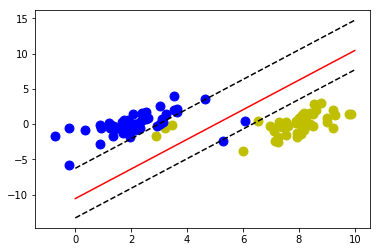

In [15]:
# 绘制超平面及支持向量
plt.plot(xx, yy, 'r-')
plt.plot(xx, yy_dowm, 'k--')
plt.plot(xx, yy_up, 'k--')

# 将数据集上的点绘制到模型图中
plt.scatter(positive[:,0], positive[:,1], s=80, c='y')
plt.scatter(negtive[:,0], negtive[:,1], s=80, c='b')

# 绘制支持向量上的点
# plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80, c='g')

plt.show()